In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from matplotlib import pyplot as plt
from abnumber import Chain, Position
from tqdm import tqdm

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [3]:
tqdm.pandas()

In [4]:
imgt = pd.read_csv('../../data/oas_stats/subsets/oas_100seqs_per_subject_and_germline_family_H.csv.gz')
imgt = imgt.groupby(['study_path','subject','v_gene_family']).apply(lambda rows: rows.sample(10, random_state=1) if len(rows) > 10 else rows)
imgt = imgt.loc[:,'1':]
print('{:,}'.format(len(imgt)))
imgt.head()

16,545


1  2  3  4  5  6  7  8  9 10  \
study_path  subject          v_gene_family                                    
Bernat_2019 Bernat_2019:A007 IGHV1         80  Q  V  Q  L  V  Q  S  G  A  -   
                                           84  Q  V  Q  L  V  Q  S  G  A  -   
                                           33  Q  V  Q  L  V  Q  S  G  A  -   
                                           81  Q  V  Q  L  V  Q  S  G  A  -   
                                           93  Q  V  Q  L  V  Q  S  G  A  -   

                                               ... 119 120 121 122 123 124  \
study_path  subject          v_gene_family     ...                           
Bernat_2019 Bernat_2019:A007 IGHV1         80  ...   G   Q   G   T   L   V   
                                           84  ...   G   Q   G   T   L   V   
                                           33  ...   G   R   G   T   L   V   
                                           81  ...   G   R   G   T   L   V   
                                           93  ...   G   Q   G   T   L   V   

                                              125 126 127 128  
study_path  subject          v_gene_family                     
Bernat_2019 Bernat_2019:A007 IGHV1         80   T   V   S   S  
                                           84   T   V   S   S  
                                           33   T   V   S   S  
                                           81   T   V   T   S  
                                           93   T   V   S   S  

[5 rows x 152 columns]

In [6]:
chains = imgt.progress_apply(lambda row: Chain(''.join(row[row != '-']), 'aho', 'north'), axis=1)
chains.head()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16545/16545 [30:38<00:00,  9.00it/s]


study_path   subject           v_gene_family    
Bernat_2019  Bernat_2019:A007  IGHV1          80    ((H1, Q), (H2, V), (H3, Q), (H4, L), (H5, V), ...
                                              84    ((H1, Q), (H2, V), (H3, Q), (H4, L), (H5, V), ...
                                              33    ((H1, Q), (H2, V), (H3, Q), (H4, L), (H5, V), ...
                                              81    ((H1, Q), (H2, V), (H3, Q), (H4, L), (H5, V), ...
                                              93    ((H1, Q), (H2, V), (H3, Q), (H4, L), (H5, V), ...
dtype: object

In [7]:
msa = Chain.to_dataframe(chains).loc[:, '1':]
msa.head()

,1,2,3,4,5,6,7,8,9,10,...,142B,142C,142D,143,144,145,146,147,148,149
Id,,,,,,,,,,,,,,,,,,,,,
0,Q,V,Q,L,V,Q,S,-,G,A,...,-,-,-,T,L,V,T,V,S,S
1,Q,V,Q,L,V,Q,S,-,G,A,...,-,-,-,T,L,V,T,V,S,S
2,Q,V,Q,L,V,Q,S,-,G,A,...,-,-,-,T,L,V,T,V,S,S
3,Q,V,Q,L,V,Q,S,-,G,A,...,-,-,-,T,L,V,T,V,T,S
4,Q,V,Q,L,V,Q,S,-,G,A,...,-,-,-,T,L,V,T,V,S,S


In [8]:
one_hot = pd.get_dummies(msa)
# Remove gap columns
one_hot = one_hot.drop(columns=[c for c in one_hot.columns if c.endswith('-')])
# Only keep columns with at least 10 samples
one_hot = one_hot[one_hot.columns[one_hot.sum() >= 10]]
one_hot

,1_D,1_E,1_H,1_Q,1_V,2_A,2_D,2_E,2_F,2_G,...,148_A,148_F,148_P,148_S,148_T,148_Y,149_A,149_P,149_S,149_T
Id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16540,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
16541,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
16542,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [11]:
%%time

matrix = one_hot.corr()
matrix.shape

CPU times: user 3min 25s, sys: 3.03 s, total: 3min 28s
Wall time: 3min 45s


(1789, 1789)

In [12]:
matrix_tall = matrix.unstack().dropna().sort_values(ascending=False).reset_index()
matrix_tall['from_pos'] = matrix_tall['level_0'].apply(lambda s: s.split('_')[0])
matrix_tall['from_aa'] = matrix_tall['level_0'].apply(lambda s: s.split('_')[1])
matrix_tall['to_pos'] = matrix_tall['level_1'].apply(lambda s: s.split('_')[0])
matrix_tall['to_aa'] = matrix_tall['level_1'].apply(lambda s: s.split('_')[1])
matrix_tall = matrix_tall[matrix_tall['from_pos'] != matrix_tall['to_pos']]
matrix_tall = matrix_tall.rename(columns={0: 'correlation'}).sort_values('correlation', ascending=False)
matrix_tall = matrix_tall.drop(columns=['level_0', 'level_1'])

matrix_tall

,correlation,from_pos,from_aa,to_pos,to_aa
1789,0.969911,93,W,99,S
1790,0.969911,99,S,93,W
1791,0.969898,16,T,3,T
1792,0.969898,3,T,16,T
1793,0.964548,16,S,41,W
...,...,...,...,...,...
3200500,-0.920418,96,L,18,T
3200509,-0.937154,22,T,16,G
3200510,-0.937154,16,G,22,T
3200517,-0.947621,16,G,18,T


In [13]:
matrix_tall.memory_usage().sum() / 1024 / 1024

145.30316162109375

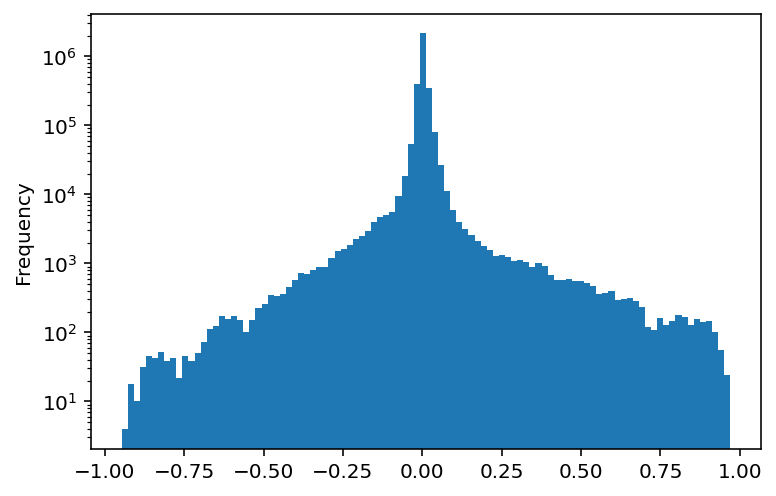

In [19]:
matrix_tall['correlation'].plot.hist(bins=100, logy=True);

In [15]:
matrix_tall.to_csv('../../data/tasks/attention/positional_residue_correlation.tsv.gz', sep='\t', index=False)

In [16]:
!ls -lh ../../data/tasks/attention/

total 49992
-rw-r--r--  1 prihodad  NORTHAMERICA\Domain Users   217B Oct 23 14:21 README.md
-rw-r--r--  1 prihodad  NORTHAMERICA\Domain Users   297K Oct 23 14:21 attn_layer_1_mean.tsv
-rw-r--r--  1 prihodad  NORTHAMERICA\Domain Users   300K Oct 23 14:21 attn_layer_2_mean.tsv
-rw-r--r--  1 prihodad  NORTHAMERICA\Domain Users   299K Oct 23 14:21 attn_layer_3_mean.tsv
-rw-r--r--  1 prihodad  NORTHAMERICA\Domain Users   300K Oct 23 14:21 attn_layer_4_mean.tsv
-rw-r--r--  1 prihodad  NORTHAMERICA\Domain Users    23M Nov 15 13:26 positional_residue_correlation.tsv.gz


In [25]:
column_positions = one_hot.columns.map(lambda s: s.split('_')[0])
matrix_per_pos = matrix.abs().groupby(column_positions, sort=False).mean().groupby(column_positions, axis=1, sort=False).mean()
matrix_per_pos = matrix_per_pos.dropna(how='all').dropna(how='all', axis=1)
matrix_per_pos.shape

(137, 137)

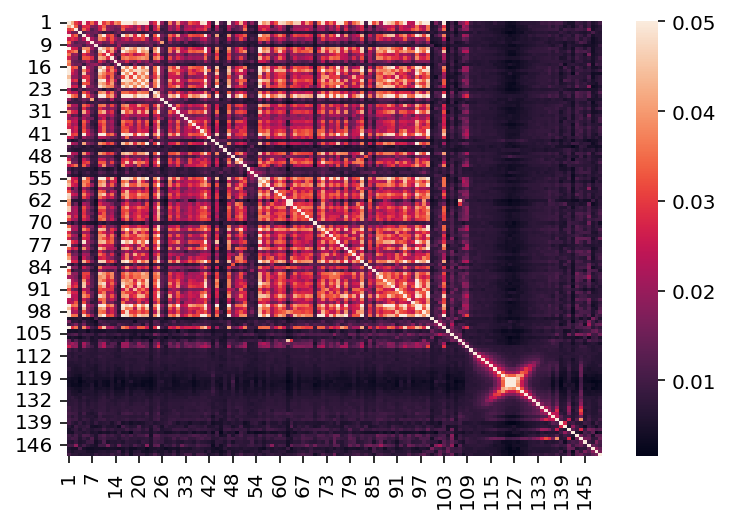

In [26]:
sns.heatmap(matrix_per_pos, vmax=0.05);